# Problem Statement
Stayze is an online market for providing lodging or primary homestays. The company does not own any real estate or properties, it acts as a broker receiving commission from each booking. The hosts rent out their property, its availability, area, type of room, price etc. and the travellers can book accordingly. The travellers put in their reviews, which is visible to others. People have used this service extensively and the company is recognized throughout the globe. All the online activities of the hosts as well as the travellers are being captured and have resulted in a rich database.

This data can be used to gain business insights, make decisions, improve security, understand the customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

The stakeholders with the help of the available data want to know the ideal prices at which the properties can be rented, as it will help them decide upon the ideal investment to be done.

## Business Understanding
**Business Impact**

**Stakeholders**
1. Chief Marketing Officer
2. Sales & Marketing Team

## Data Understanding


## Data Science Problem ##

The aim of this project is to propose a data-driven solution, by using machine learning to predict homestays rental price.

p.s. Foursquare API is used for the rental prices vs property proximity to certain venues, we use the Foursquare API to access the city's venues and the street network, available though OpenStreepMap (OSM).

## Evaluation Metric ##

*Caution: This is only a reference template and not the entire DS pipeline*

#### Install required packages ####

In [1]:
# general required packages
import sys
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install datetime
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn
# packages for neighbourhood analysis
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install descartes
!{sys.executable} -m pip install requests
# package to run geopandas
!conda install -c conda-forge libspatialindex -y

    ERROR: Command errored out with exit status 1:
     command: 'd:\anaconda\envs\stayz\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-n_iorfxl\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-n_iorfxl\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Admin\AppData\Local\Temp\pip-pip-egg-info-v25x3sa_'
         cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-n_iorfxl\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command outpu


  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached Shapely-1.7.1-cp37-cp37m-win_amd64.whl (1.0 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'd:\anaconda\envs\stayz\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-5bsqxqaj\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-5bsqxqaj\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Admin\AppData\Local\Temp\pip-pip-egg-info-5p9_b77z'
         cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-5bsqxqaj\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command outpu

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda\envs\stayz

  added / updated specs:
    - libspatialindex


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py37hf50a25e_2         152 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         152 KB

The following packages will be UPDATED:

  certifi                          2020.6.20-py37hc8dfbb8_0 --> 2020.6.20-py37hf50a25e_2




certifi-2020.6.20    | 152 KB    |            |   0% 
certifi-2020.6.20    | 152 KB    | ########## | 100% 
certifi-2020.6.20    | 152 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [1]:
import os
print(os.getcwd())


C:\Users\Admin\GreyAtom\Hackathon


**Import necessary libraries**

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import winsorize
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline

**Read the input file**

In [130]:
sz = pd.read_csv('Updated Train.csv')
#sz_test = pd.read_csv('Test.csv').set_index('id')
sz_test = pd.read_csv('Updated Test.csv')

**Basic understanding of data**

In [131]:
sz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      34226 non-null  int64  
 1   id                              34226 non-null  int64  
 2   name                            34214 non-null  object 
 3   host_id                         34226 non-null  int64  
 4   host_name                       34213 non-null  object 
 5   neighbourhood_group             34226 non-null  object 
 6   neighbourhood                   34226 non-null  object 
 7   latitude                        34226 non-null  float64
 8   longitude                       34226 non-null  float64
 9   room_type                       34226 non-null  object 
 10  price                           34226 non-null  int64  
 11  minimum_nights                  34226 non-null  int64  
 12  number_of_reviews               

In [132]:
sz.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,Times Square,Centeral Park Zoo,Statue of Liberty,Wall Street
count,34226.000000,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,17112.500000,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730,4.013413,4.484498,4.419647,4.550883,6.547427,4.833024
std,9880.339493,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814,2.423561,2.827542,2.757052,2.755731,2.868686,2.843198
min,0.000000,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.131845,0.207987,0.042559,0.102716,1.671930,0.006390
25%,8556.250000,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,2.220941,2.465273,2.377677,2.575845,4.568308,2.874563
50%,17112.500000,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000,3.638464,3.830115,3.983474,4.019831,5.778045,4.171251
75%,25668.750000,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000,5.058962,5.924699,5.862176,6.107899,8.049915,6.245418
max,34225.000000,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,22.671049,19.155912,22.306142,23.278904,18.193326,18.739405


In [133]:
sz_test.describe()

,Unnamed: 0,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,Times Square,Centeral Park Zoo,Statue of Liberty,Wall Street
count,14669.000000,1.466900e+04,1.466900e+04,14669.000000,14669.000000,14669.000000,14669.000000,11599.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000
mean,7334.000000,1.909894e+07,6.827691e+07,40.728693,-73.952402,7.207921,23.002727,1.364172,7.260822,111.567114,3.998304,4.464857,4.409117,4.542844,6.524052,4.812503
std,4234.719884,1.099968e+07,7.925935e+07,0.054359,0.046148,21.092531,44.722549,1.660318,33.241116,130.985364,2.433251,2.807076,2.757743,2.763537,2.845739,2.822876
min,0.000000,2.539000e+03,2.787000e+03,40.506410,-74.242850,1.000000,0.000000,0.010000,1.000000,0.000000,0.137240,0.222958,0.076781,0.117871,1.550155,0.005925
25%,3667.000000,9.493324e+06,7.809661e+06,40.690160,-73.982890,1.000000,1.000000,0.190000,1.000000,0.000000,2.199296,2.469158,2.366064,2.576522,4.585721,2.886865
50%,7334.000000,1.972191e+07,3.121494e+07,40.723220,-73.955640,3.000000,5.000000,0.700000,1.000000,44.000000,3.614583,3.789744,3.943143,4.012226,5.756129,4.142617
75%,11001.000000,2.931293e+07,1.074344e+08,40.762950,-73.936860,5.000000,23.000000,2.020000,2.000000,223.000000,5.018402,5.872563,5.830232,6.074469,7.992305,6.200379
max,14668.000000,3.648409e+07,2.743213e+08,40.908040,-73.716900,999.000000,594.000000,20.940000,327.000000,365.000000,22.361401,18.855620,21.969506,22.944919,18.217067,18.428992


In [134]:
sz.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,Times Square,Centeral Park Zoo,Statue of Liberty,Wall Street
0,0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,...,2015-09-01,0.06,3,0,2.618880,1.115712,2.523134,3.374983,3.458765,1.336049
1,1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,...,NaN,NaN,1,0,3.580205,6.775808,3.196753,2.316035,8.841769,6.983262
2,2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,...,2019-07-05,4.00,1,365,3.466122,6.417942,4.835721,4.201221,9.156315,6.956573
3,3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,...,NaN,NaN,4,82,11.952362,8.416545,11.881329,12.798329,6.339789,8.111966
4,4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,...,2019-05-26,0.27,1,365,4.353010,7.733816,4.247478,3.303651,9.916294,7.989692


**Scatter plot for Lat-Long**

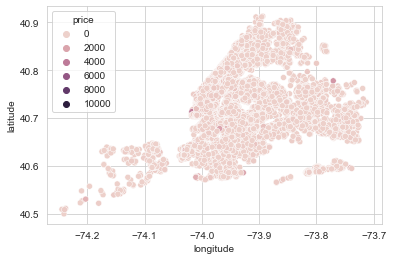

In [135]:
sns.scatterplot(data=sz,x='longitude',y='latitude',hue='price',alpha='auto')
plt.show()

In [136]:
#sz.drop(['id','name','host_id','host_name'],axis=1,inplace=True)

**Treat null values**

In [137]:
sz.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
Empire State Buillding               0
Brooklyn                             0
Times Square                         0
Centeral Park Zoo                    0
Statue of Liberty                    0
Wall Street                          0
dtype: int64

In [138]:
sz_test.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 4
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       3070
reviews_per_month                 3070
calculated_host_listings_count       0
availability_365                     0
Empire State Buillding               0
Brooklyn                             0
Times Square                         0
Centeral Park Zoo                    0
Statue of Liberty                    0
Wall Street                          0
dtype: int64

In [139]:
sz['last_review'].head()

0    2015-09-01
1           NaN
2    2019-07-05
3           NaN
4    2019-05-26
Name: last_review, dtype: object

In [140]:
sz['last_review'] = pd.to_datetime(sz['last_review'])

In [141]:
earliest_date = min(sz['last_review'])
latest_date = max(sz['last_review'])

print(earliest_date,latest_date)

2011-03-28 00:00:00 2019-07-08 00:00:00


In [142]:
sz.last_review=sz.last_review.fillna('2011-01-01')


In [143]:
sz_test.last_review=sz_test.last_review.fillna('2011-01-01')

In [144]:
sz.reviews_per_month=sz.reviews_per_month.fillna(0)


In [145]:
sz_test.reviews_per_month=sz_test.reviews_per_month.fillna(0)

In [146]:
#Remove unnecessary columns
sz.drop(['name','host_id','host_name'],axis=1,inplace=True)


In [147]:
sz_test.drop(['name','host_id','host_name'],axis=1,inplace=True)

In [148]:
sz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      34226 non-null  int64  
 1   id                              34226 non-null  int64  
 2   neighbourhood_group             34226 non-null  object 
 3   neighbourhood                   34226 non-null  object 
 4   latitude                        34226 non-null  float64
 5   longitude                       34226 non-null  float64
 6   room_type                       34226 non-null  object 
 7   price                           34226 non-null  int64  
 8   minimum_nights                  34226 non-null  int64  
 9   number_of_reviews               34226 non-null  int64  
 10  last_review                     34226 non-null  object 
 11  reviews_per_month               34226 non-null  float64
 12  calculated_host_listings_count  

In [149]:
sz_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      14669 non-null  int64  
 1   id                              14669 non-null  int64  
 2   neighbourhood_group             14669 non-null  object 
 3   neighbourhood                   14669 non-null  object 
 4   latitude                        14669 non-null  float64
 5   longitude                       14669 non-null  float64
 6   room_type                       14669 non-null  object 
 7   minimum_nights                  14669 non-null  int64  
 8   number_of_reviews               14669 non-null  int64  
 9   last_review                     14669 non-null  object 
 10  reviews_per_month               14669 non-null  float64
 11  calculated_host_listings_count  14669 non-null  int64  
 12  availability_365                

In [150]:
sz.isnull().sum()

Unnamed: 0                        0
id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Empire State Buillding            0
Brooklyn                          0
Times Square                      0
Centeral Park Zoo                 0
Statue of Liberty                 0
Wall Street                       0
dtype: int64

In [151]:
sz_test.isnull().sum()

Unnamed: 0                        0
id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Empire State Buillding            0
Brooklyn                          0
Times Square                      0
Centeral Park Zoo                 0
Statue of Liberty                 0
Wall Street                       0
dtype: int64

***EDA***

****Univariate****

In [152]:
#Categorical variables - neighbourhood_group | room_type| neighbourhood
cat = sz.select_dtypes(include=object).columns

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


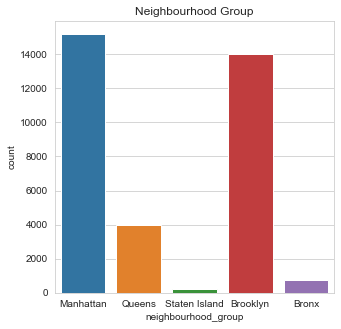

In [153]:
plt.figure(figsize=(5,5))
sns.countplot(sz['neighbourhood_group'])
plt.title("Neighbourhood Group")
plt.show()

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


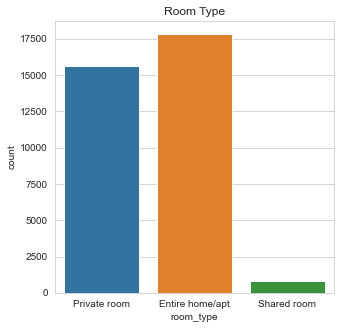

In [154]:
plt.figure(figsize=(5,5))
sns.countplot(sz['room_type'])
plt.title("Room Type")
plt.show()

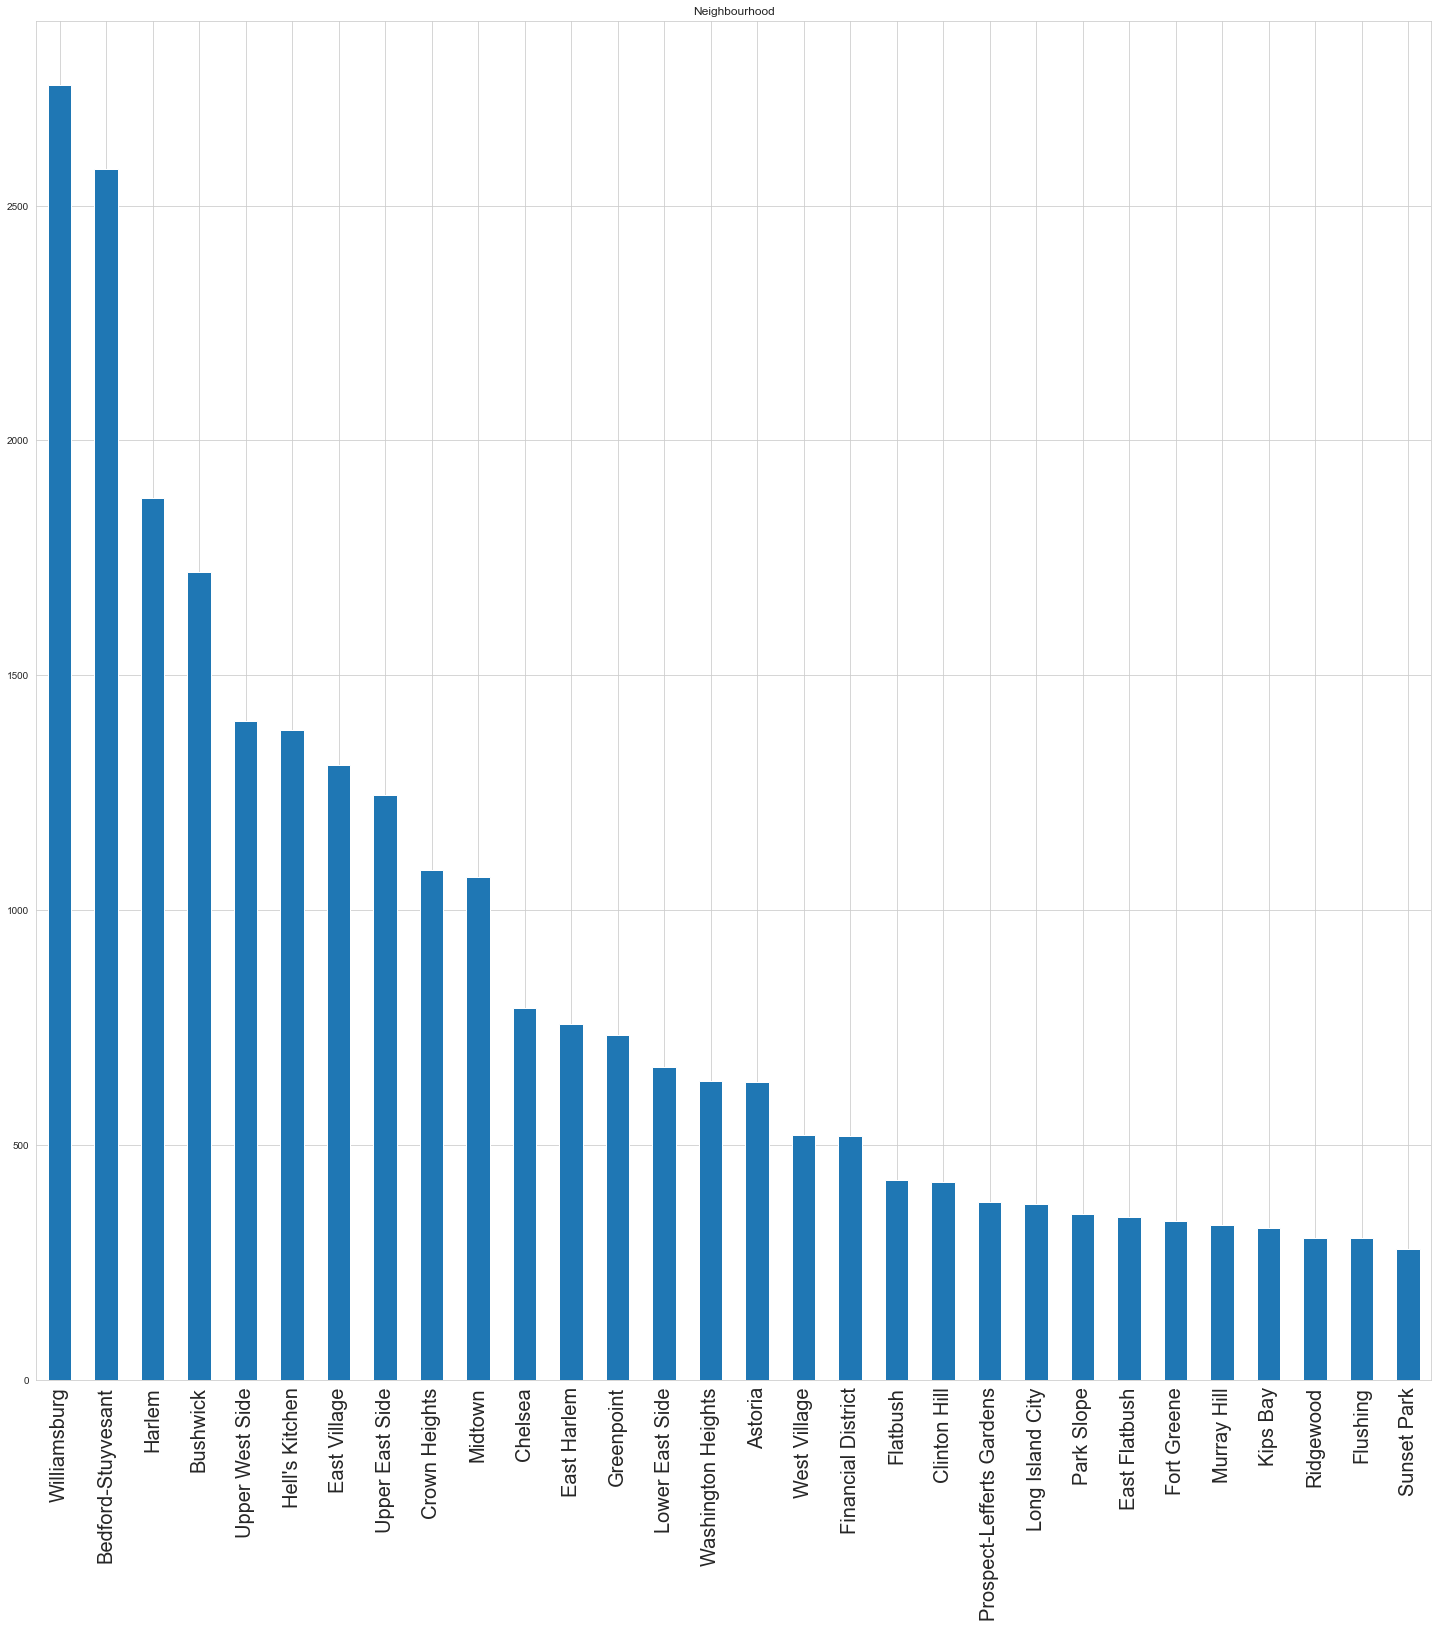

In [155]:
plt.figure(figsize=(25,25))
sz['neighbourhood'].value_counts().iloc[:30].plot(kind='bar')
plt.title("Neighbourhood")
plt.xticks(fontsize=20)
plt.show()

****Insight****

Manhattan and Broklyn are the most favoured
Staten Island is the least favoured. Could be considered as only a nearby sightseeing place.

Privacy is of prominance

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


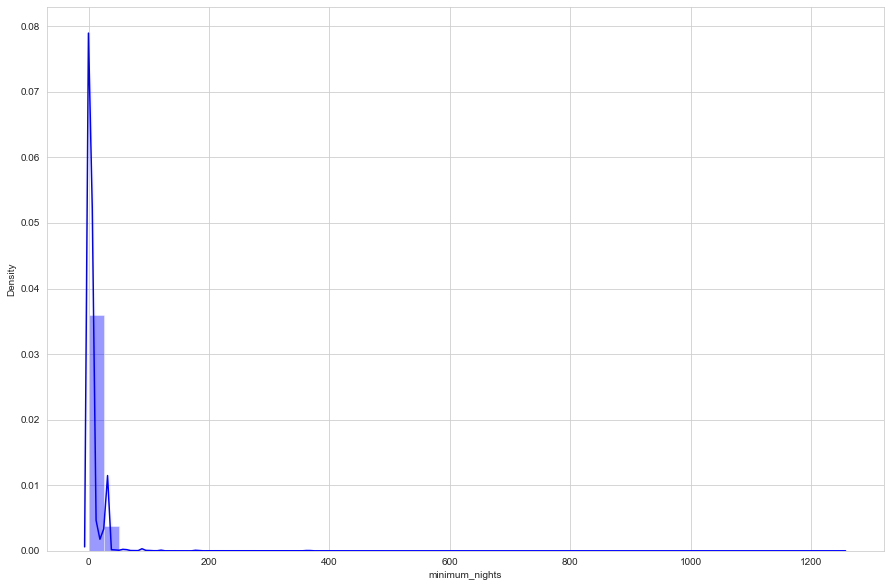

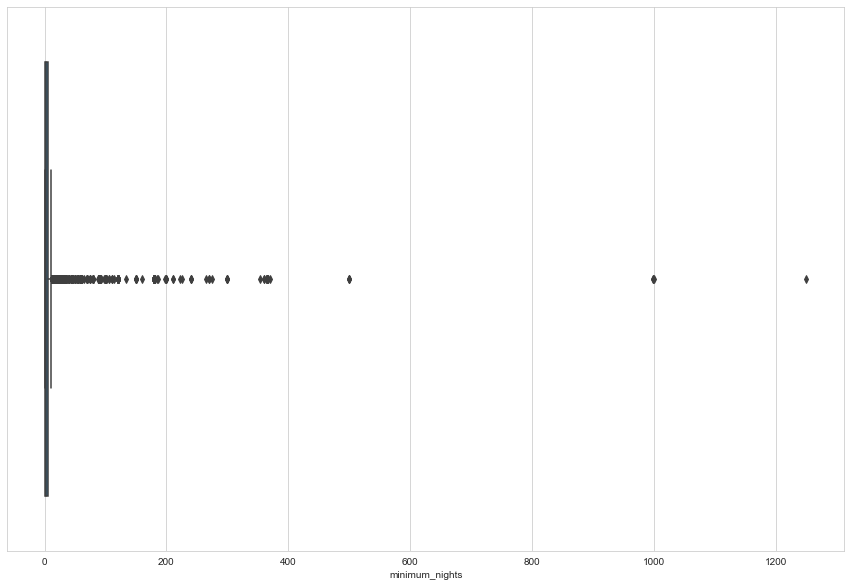

Skew: 18.815093682550792

After Log_Transform:


d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


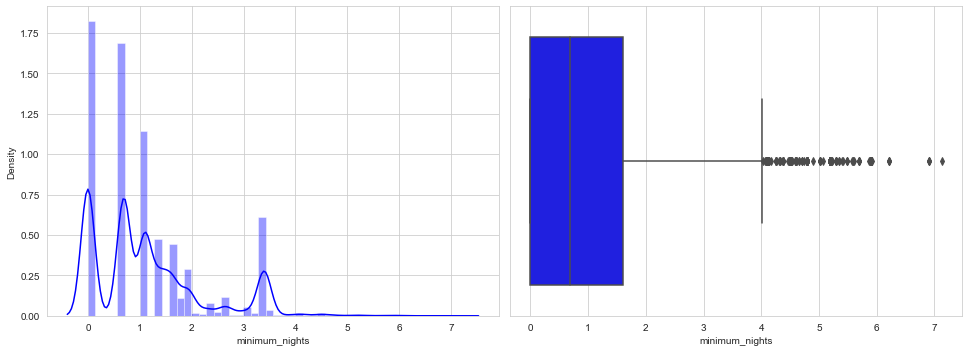

Skew: 1.1159827773728626


In [156]:
#understand minimum_neights column
plt.figure(figsize=(15,10))
sns.distplot(sz['minimum_nights'],color ='b')
plt.show() 

plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
#sns.boxplot(x='minimum_nights',data=sz)
ax=sns.boxplot(x=sz['minimum_nights'])
#plt.xlim(0,400)
plt.show() 

print('Skew:',sz['price'].skew())

print('\nAfter Log_Transform:') 
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(np.log(sz['minimum_nights']),color ='b')
plt.subplot(132)            
sns.boxplot(np.log(sz['minimum_nights']),color ='b')
plt.tight_layout()
plt.show() 
print('Skew:',np.log(sz['minimum_nights']).skew())

****Insight****
stay is upto 150 nights i.e. 5months

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


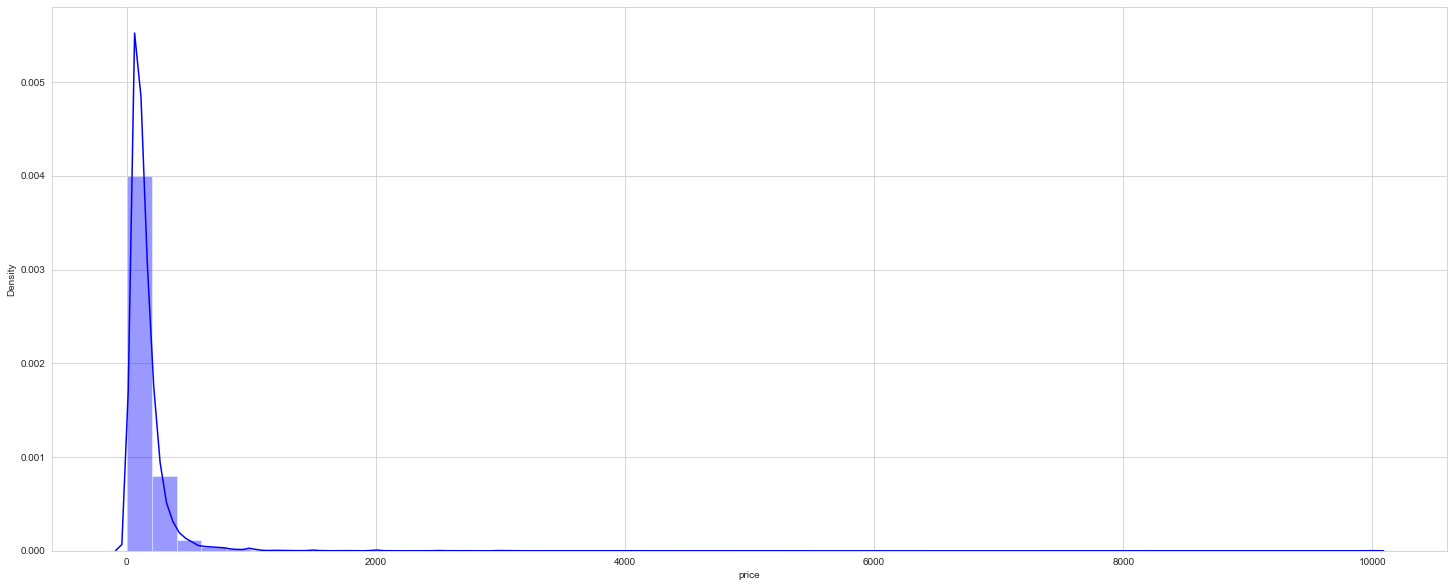

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


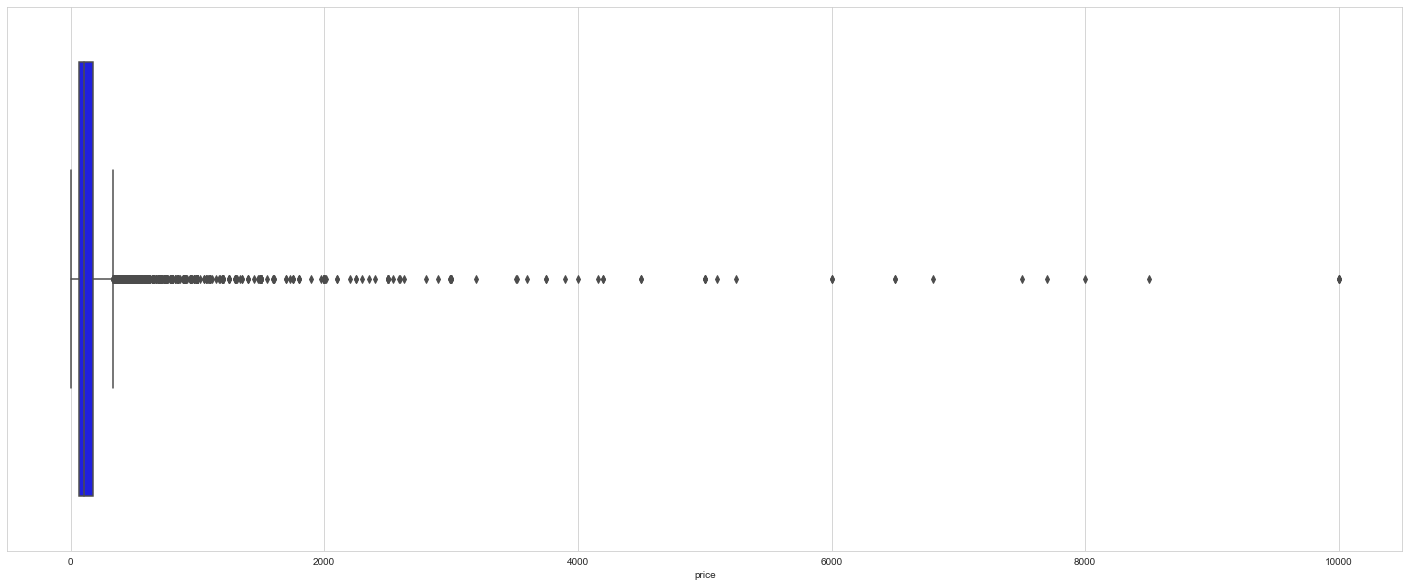

Skew: 18.815093682550792

After Log_Transform:


d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


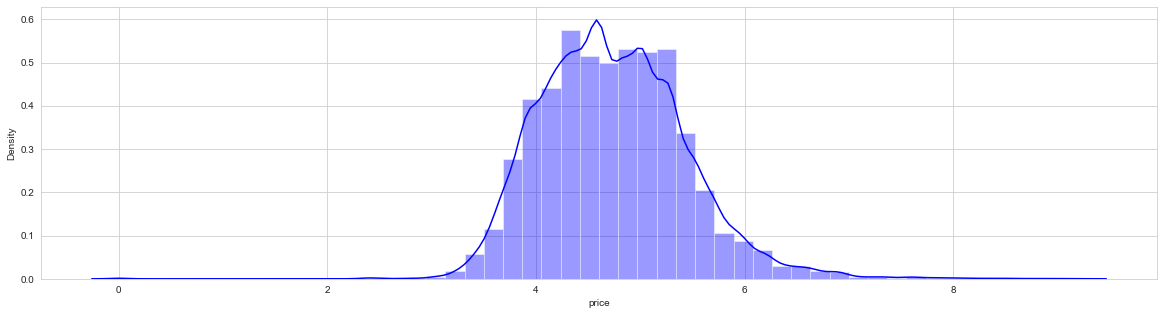

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


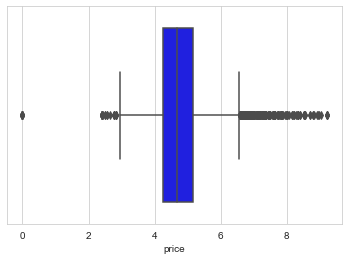

Skew: 0.5516886042775462


In [157]:
#Understand price field
plt.figure(figsize=(25,10))
sns.distplot(sz['price'],color ='b')
plt.show()

plt.figure(figsize=(25,10))
sns.boxplot(sz['price'],color ='b')
plt.show() 

print('Skew:',sz['price'].skew())

print('\nAfter Log_Transform:') 
plt.figure(figsize=(20,5))

sns.distplot(np.log1p(sz['price']),color ='b')
plt.show()

sns.boxplot(np.log1p(sz['price']),color ='b')
plt.show() 
print('Skew:',np.log1p(sz['price']).skew())

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


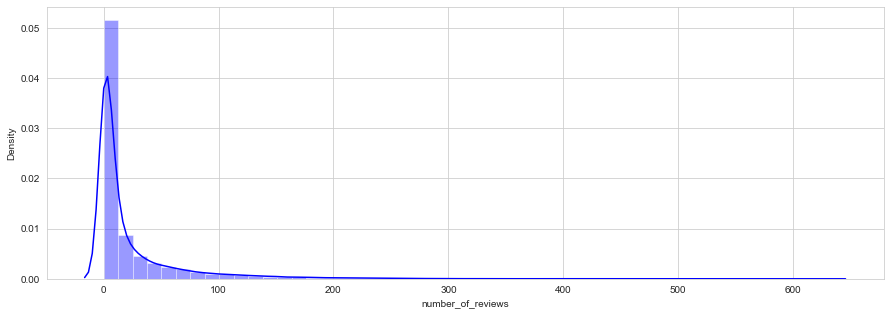

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


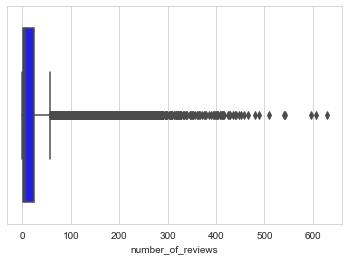

Skew: 3.6453649218348216 
After Log_Transform:


d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


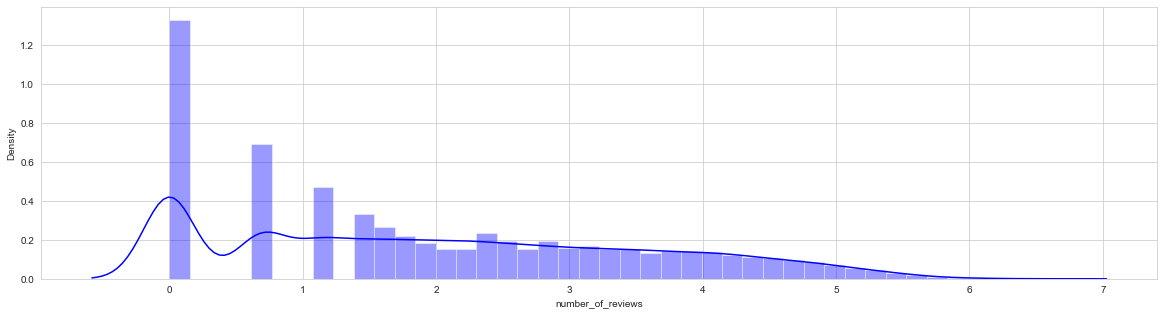

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


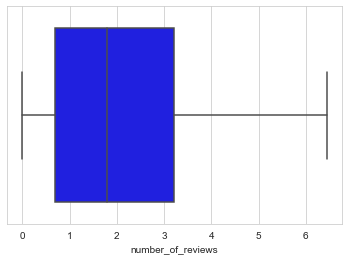

Skew: 0.35768611242741927


In [158]:
#Understand number_of_reviews

plt.figure(figsize=(15,5))
sns.distplot(sz['number_of_reviews'],color ='b')
plt.show()

sns.boxplot(sz['number_of_reviews'],color ='b')
plt.show() 

print('Skew:',sz['number_of_reviews'].skew(),'\nAfter Log_Transform:') 

plt.figure(figsize=(20,5))
sns.distplot(np.log1p(sz['number_of_reviews']),color ='b')
plt.show()

sns.boxplot(np.log1p(sz['number_of_reviews']),color ='b')

plt.show() 
print('Skew:',np.log1p(sz['number_of_reviews']).skew())

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


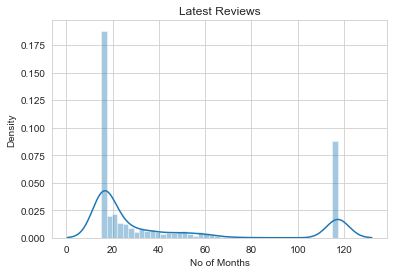

In [159]:
#Understand latest_review

sz.last_review=pd.to_datetime(sz.last_review)
sns.distplot((pd.to_datetime('now')-sz.last_review)/np.timedelta64(1,'M'))
plt.xlabel('No of Months')
plt.title('Latest Reviews')

plt.show()

****Insight****
People did not favour giving reviews or they have not yet complete their stay

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='last_review', ylabel='count'>

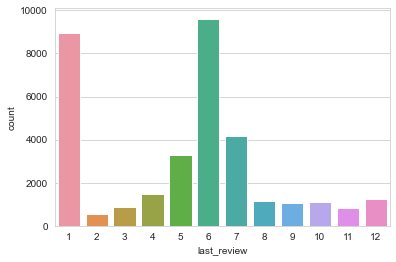

In [160]:
#Understand last review

sns.countplot(sz.last_review.dt.month)

****Insight****
Jan & June have night demand and Feb has least demand

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


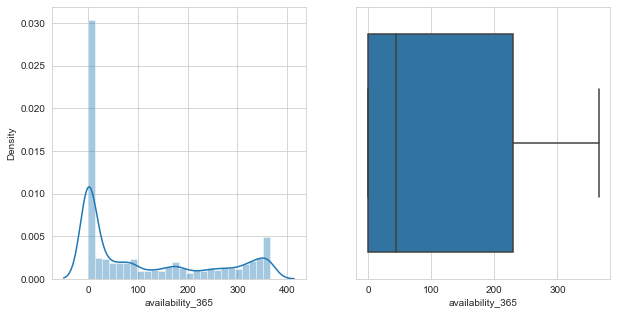

In [161]:
#Understand availability_365 vairable

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(sz['availability_365'])
plt.subplot(122)            
sns.boxplot(sz['availability_365'])
plt.show() 


****Insight****
Most of the rooms are booked. 

**Histograms of numeric data**

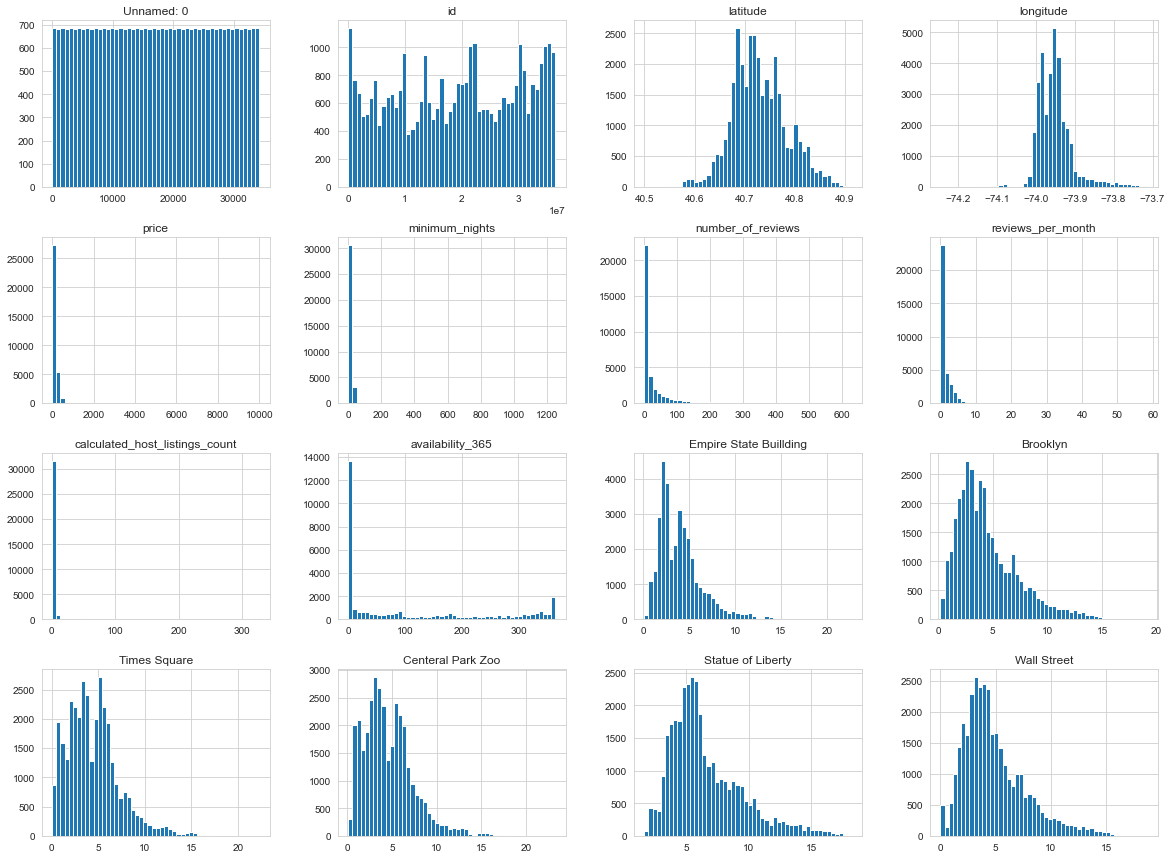

In [162]:
sz.hist(bins=50,figsize=(20,15))
plt.savefig("HIST PLOTS")
plt.show()

**Understand Skewness**

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


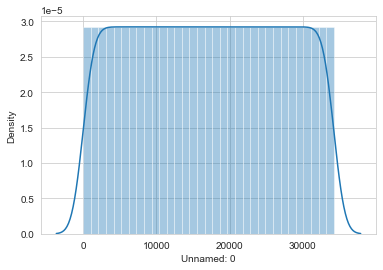

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


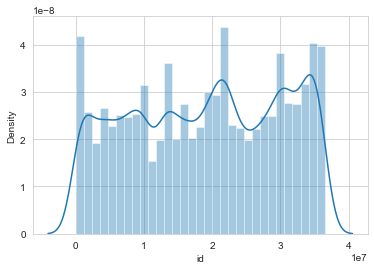

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


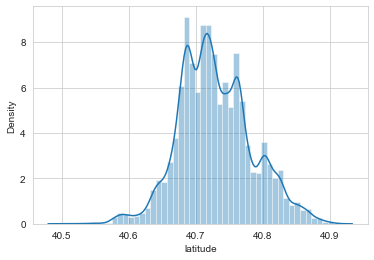

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


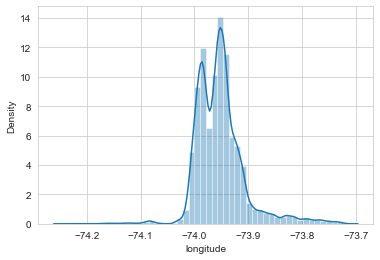

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


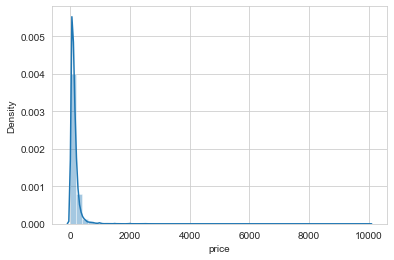

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


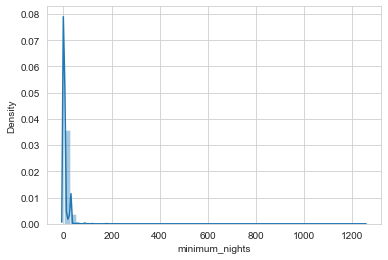

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


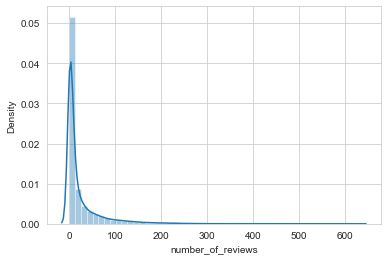

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


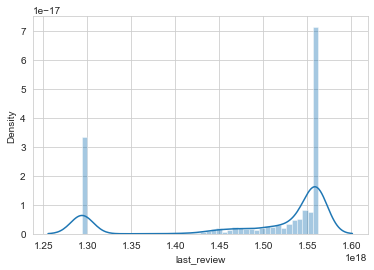

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


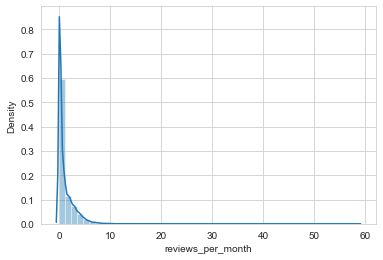

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


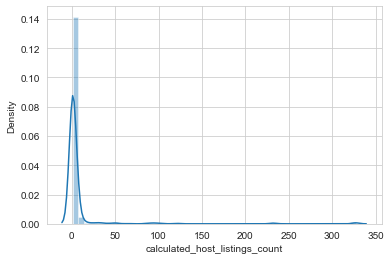

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


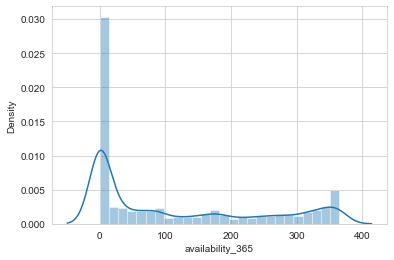

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


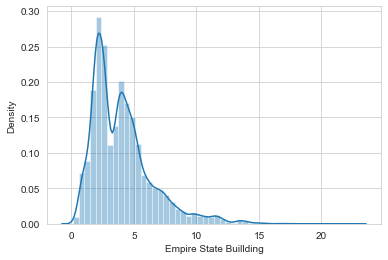

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


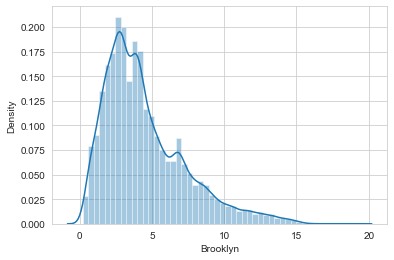

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


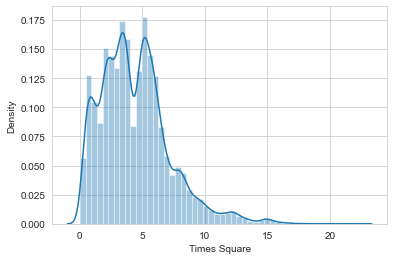

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


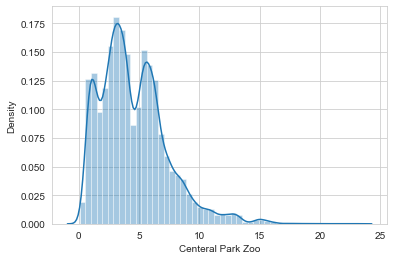

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


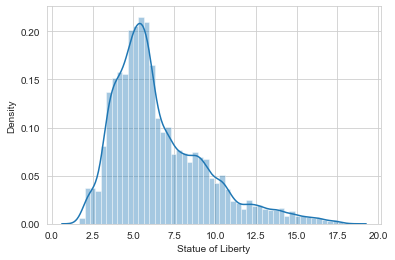

d:\anaconda\envs\stayz\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


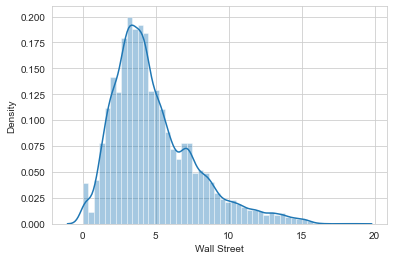

In [163]:
for col in sz.select_dtypes(exclude=object):
    sns.distplot(sz[col])
    plt.show()

***Bivaraite Analysis***

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


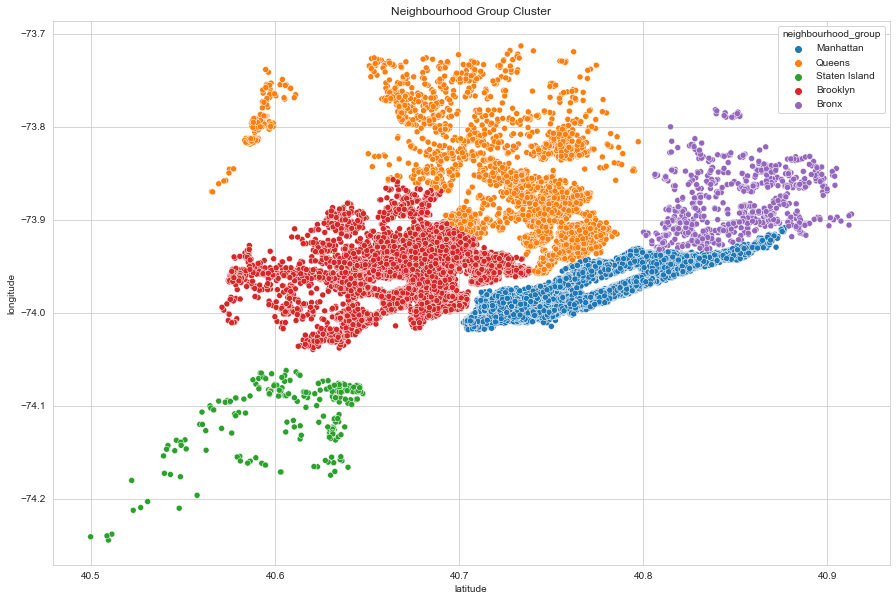

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


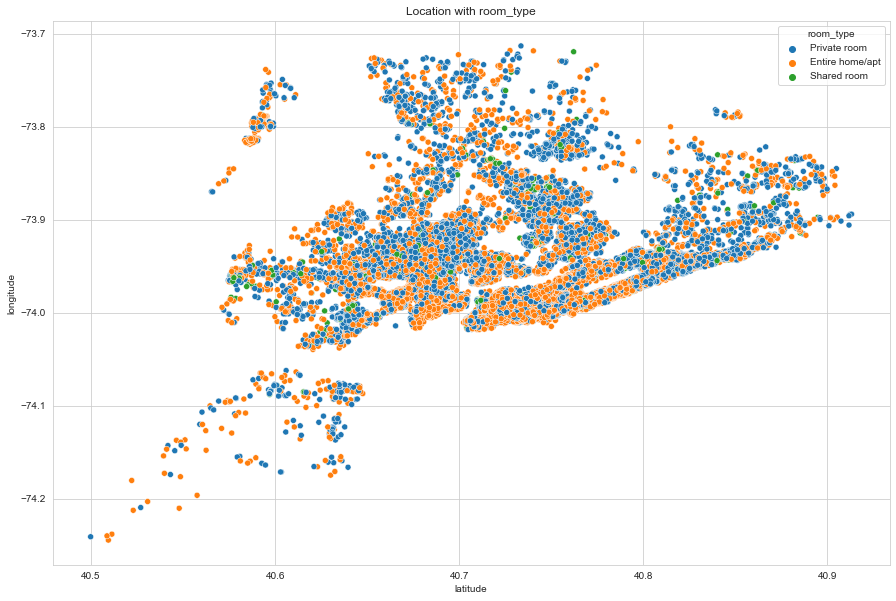

In [164]:
#Location

plt.figure(figsize=(15,10))
sns.scatterplot(sz.latitude,sz.longitude,hue=sz['neighbourhood_group'])
plt.title('Neighbourhood Group Cluster')
plt.show()

plt.figure(figsize=(15,10))
sns.scatterplot(sz.latitude,sz.longitude,hue=sz['room_type'])
plt.title('Location with room_type')
plt.show()

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


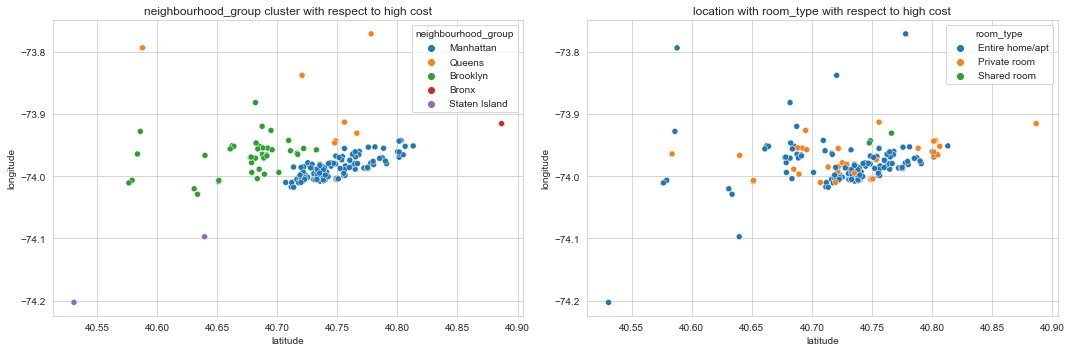

In [165]:
#location and price >2000
sz1=sz[sz.price>1000]
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(sz1.latitude,sz1.longitude,hue=sz1['neighbourhood_group'])
plt.title('neighbourhood_group cluster with respect to high cost')
plt.subplot(122)
sns.scatterplot(sz1.latitude,sz1.longitude,hue=sz1['room_type'])
plt.title('location with room_type with respect to high cost')
plt.tight_layout()
plt.show()

****Insight****
High priced stays are mainly in Manhattan and Brooklyn of type entire home or private room.
Interestingly there are are some high price shared rooms in Bronx

Text(0.5, 1.0, 'room type based on neighbourhood and price')

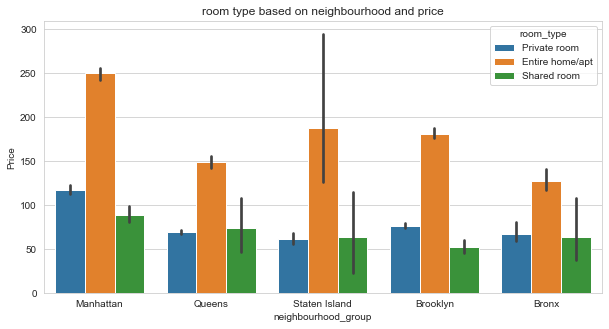

In [166]:
#price vs neighbourhood_group
plt.figure(figsize=(10,5))
sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=sz)
plt.ylabel("Price")
plt.title("room type based on neighbourhood and price")


****Insight****
Manhattan is the most expensive irrespective of room type.

d:\anaconda\envs\stayz\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


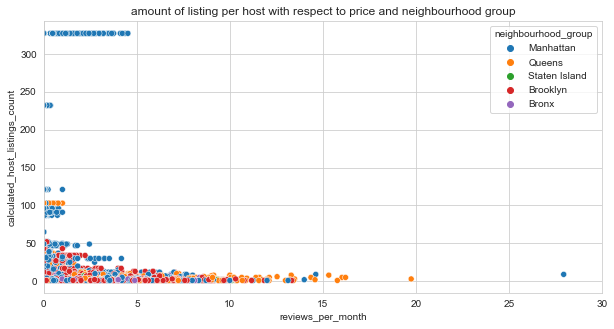

In [167]:
#host listings vs reviews per month

plt.figure(figsize=(10,5))
sns.scatterplot(sz['reviews_per_month'],sz['calculated_host_listings_count'],hue=sz['neighbourhood_group']).set(xlim=(0,30))
plt.title('amount of listing per host with respect to price and neighbourhood group')
#set(xlim=(0,30))
plt.show()

****Insight****

Manhattan has most listings with reviews in 5 months
All neighbourhood groups usually have 50 listings

In [168]:
#Drop irrelevant columns

sz.drop(sz.columns[[0,1]],axis=1,inplace=True)
sz.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,Times Square,Centeral Park Zoo,Statue of Liberty,Wall Street
0,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0,2.618880,1.115712,2.523134,3.374983,3.458765,1.336049
1,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,2011-01-01,0.00,1,0,3.580205,6.775808,3.196753,2.316035,8.841769,6.983262
2,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365,3.466122,6.417942,4.835721,4.201221,9.156315,6.956573
3,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,2011-01-01,0.00,4,82,11.952362,8.416545,11.881329,12.798329,6.339789,8.111966
4,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365,4.353010,7.733816,4.247478,3.303651,9.916294,7.989692


***Normalization***

In [169]:
sz['last_review'] = pd.to_datetime(sz['last_review'])
sz['last_review'] = ((pd.to_datetime('now')-sz['last_review'])/np.timedelta64(1,'M'))

In [170]:
sz[['last_review']]

,last_review
0,61.326547
1,117.311270
2,15.231145
3,117.311270
4,16.545340
...,...
34221,24.364803
34222,15.461129
34223,18.385214
34224,117.311270


In [171]:
def normalize(df):
    sk = df.skew()
    skewed = sk[sk>0.6]
    new_df = df.copy()
    for col in skewed.index.drop('longitude').tolist():
        new_df[col] = np.log1p(df[col])
        print(col)
    return new_df

In [172]:
normalized_sz = normalize(sz)

price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
Empire State Buillding
Brooklyn
Times Square
Centeral Park Zoo
Statue of Liberty
Wall Street


***Standardization***

In [173]:
treated_sz = normalized_sz
num = treated_sz.select_dtypes(exclude=object).columns
cat = treated_sz.select_dtypes(include=object).columns

sc = StandardScaler()
treated_sz[num.drop('price')] = sc.fit_transform(treated_sz[num.drop('price')])

In [174]:
treated_sz.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,Times Square,Centeral Park Zoo,Statue of Liberty,Wall Street
0,Manhattan,Nolita,-0.126158,-0.925911,Private room,4.795791,0.671727,-0.390877,0.879907,-0.841806,0.352916,-1.217137,-0.496005,-1.654292,-0.548485,-0.222422,-1.295387,-1.639258
1,Manhattan,Upper West Side,1.302892,-0.181543,Entire home/apt,7.313887,-0.928176,-1.276706,1.717185,-0.942575,-0.458048,-1.217137,0.028204,0.945471,-0.224282,-0.763940,0.928623,0.877780
2,Queens,East Elmhurst,0.485716,1.276213,Entire home/apt,5.303305,-0.460234,-0.248290,-0.877720,1.840733,-0.458048,1.178208,-0.027923,0.851366,0.386632,0.115602,1.016992,0.870921
3,Staten Island,Concord,-2.343446,-2.734621,Shared room,3.433987,-0.460234,-1.276706,1.717185,-0.942575,0.613989,0.576071,2.341366,1.327860,1.853812,2.022032,0.104692,1.148641
4,Manhattan,Harlem,1.486399,0.203856,Shared room,4.753590,-0.928176,0.533691,-0.776013,-0.529227,-0.458048,1.178208,0.375145,1.177530,0.189749,-0.254544,1.219687,1.120970


In [175]:
treated_sz['last_review']

0        0.879907
1        1.717185
2       -0.877720
3        1.717185
4       -0.776013
           ...   
34221   -0.294529
34222   -0.859340
34223   -0.645742
34224    1.717185
34225    0.527082
Name: last_review, Length: 34226, dtype: float64

In [176]:
len(treated_sz.columns)

18

In [177]:
treated_sz = pd.get_dummies(treated_sz)
treated_sz.head(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Empire State Buillding,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.126158,-0.925911,4.795791,0.671727,-0.390877,0.879907,-0.841806,0.352916,-1.217137,-0.496005,...,0,0,0,0,0,0,0,0,1,0
1,1.302892,-0.181543,7.313887,-0.928176,-1.276706,1.717185,-0.942575,-0.458048,-1.217137,0.028204,...,0,0,0,0,0,0,0,1,0,0
2,0.485716,1.276213,5.303305,-0.460234,-0.248290,-0.877720,1.840733,-0.458048,1.178208,-0.027923,...,0,0,0,0,0,0,0,1,0,0
3,-2.343446,-2.734621,3.433987,-0.460234,-1.276706,1.717185,-0.942575,0.613989,0.576071,2.341366,...,0,0,0,0,0,0,0,0,0,1
4,1.486399,0.203856,4.753590,-0.928176,0.533691,-0.776013,-0.529227,-0.458048,1.178208,0.375145,...,0,0,0,0,0,0,0,0,0,1
5,-0.313877,-1.378901,5.420535,3.477793,-0.833791,0.735137,-0.908329,-0.458048,1.174868,0.181644,...,0,0,0,0,0,0,0,1,0,0
6,-1.307601,4.845973,4.110874,-0.928176,1.317879,-0.885678,1.178860,-0.458048,1.144708,2.607195,...,0,0,0,0,0,0,0,1,0,0
7,-0.703601,-0.582973,5.303305,0.339718,-1.276706,1.717185,-0.942575,-0.458048,-1.217137,0.280333,...,0,0,0,0,0,0,0,1,0,0
8,0.281514,-1.040945,6.478510,-0.128224,1.013129,-0.872443,0.716493,0.016336,0.890215,-0.779887,...,0,0,0,0,0,0,0,1,0,0
9,1.879786,0.198657,5.198497,2.234990,-0.033288,0.319230,-0.700875,-0.458048,-1.217137,0.912297,...,0,0,0,0,0,0,0,1,0,0


***Correlation***

In [178]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(treated_sz.loc[:,~treated_sz.columns.isin(['latitude','longitude'])], figsize=(20, 20))
#plt.savefig('corr.png')
#plt.show()

In [179]:
corrmatrix = treated_sz.corr()

In [180]:
#plt.figure(figsize=(12,10))
#sns.heatmap(corrmatrix, annot=True, cmap=plt.cm.Reds)
#plt.savefig('corr1.png')
#plt.show()

In [181]:
corrmatrix

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Empire State Buillding,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
latitude,1.000000,0.085919,0.075615,0.033042,-0.030616,0.037356,-0.024954,0.031889,-0.014190,-0.289576,...,0.017426,0.086523,-0.088999,-0.074529,-0.029486,0.047649,0.021547,-0.007143,0.004867,0.007561
longitude,0.085919,1.000000,-0.323895,-0.132562,0.082426,-0.090583,0.135789,-0.040539,0.110164,0.397155,...,0.049474,0.063791,0.001389,-0.030605,0.087073,0.028243,0.075115,-0.190317,0.182414,0.027934
price,0.075615,-0.323895,1.000000,0.068425,-0.067450,0.072499,-0.061895,0.046001,0.090024,-0.351731,...,-0.008702,-0.017873,0.014639,0.004410,-0.041103,-0.015733,-0.045085,0.612428,-0.563022,-0.168769
minimum_nights,0.033042,-0.132562,0.068425,1.000000,-0.221500,0.177560,-0.294743,0.341882,0.145364,-0.143327,...,-0.010165,-0.000449,-0.002620,0.006357,-0.013027,-0.010615,0.018255,0.181090,-0.168956,-0.041759
number_of_reviews,-0.030616,0.082426,-0.067450,-0.221500,1.000000,-0.735783,0.759367,-0.093443,0.294288,0.107820,...,0.001351,0.009273,-0.018238,0.003382,0.010045,0.010647,-0.015817,0.008645,-0.000113,-0.028159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
neighbourhood_Woodlawn,0.047649,0.028243,-0.015733,-0.010615,0.010647,-0.011501,0.017618,-0.001999,0.007605,0.034521,...,-0.000261,-0.000482,-0.004525,-0.000836,-0.000662,1.000000,-0.001074,-0.000640,0.001363,-0.002370
neighbourhood_Woodside,0.021547,0.075115,-0.045085,0.018255,-0.015817,0.009622,-0.000638,0.050220,0.012054,-0.021569,...,-0.001201,-0.002215,-0.020784,-0.003840,-0.003040,-0.001074,1.000000,-0.034741,0.037318,-0.008124
room_type_Entire home/apt,-0.007143,-0.190317,0.612428,0.181090,0.008645,-0.013017,-0.020758,0.004735,-0.001256,-0.166925,...,-0.007560,-0.005034,-0.020130,0.025607,-0.027534,-0.000640,-0.034741,1.000000,-0.953960,-0.161628
room_type_Private room,0.004867,0.182414,-0.563022,-0.168956,-0.000113,0.010136,0.020300,-0.021999,-0.012427,0.160896,...,0.008389,0.006535,0.029390,-0.023111,0.028300,0.001363,0.037318,-0.953960,1.000000,-0.141803


In [182]:
corr=treated_sz.corr().stack().reset_index()
corr1=corr[~(corr[0]==1)]

In [183]:
corr1.head()

,level_0,level_1,0
1,latitude,longitude,0.085919
2,latitude,price,0.075615
3,latitude,minimum_nights,0.033042
4,latitude,number_of_reviews,-0.030616
5,latitude,last_review,0.037356


In [184]:
corr1.rename(columns={0:'corrvalue'})

,level_0,level_1,corrvalue
1,latitude,longitude,0.085919
2,latitude,price,0.075615
3,latitude,minimum_nights,0.033042
4,latitude,number_of_reviews,-0.030616
5,latitude,last_review,0.037356
...,...,...,...
57594,room_type_Shared room,neighbourhood_Woodhaven,-0.002241
57595,room_type_Shared room,neighbourhood_Woodlawn,-0.002370
57596,room_type_Shared room,neighbourhood_Woodside,-0.008124
57597,room_type_Shared room,room_type_Entire home/apt,-0.161628


In [185]:
corr2=corr1.rename(columns={0:'corrval'},inplace=False)
corr2.head()

,level_0,level_1,corrval
1,latitude,longitude,0.085919
2,latitude,price,0.075615
3,latitude,minimum_nights,0.033042
4,latitude,number_of_reviews,-0.030616
5,latitude,last_review,0.037356


In [186]:
corr3=corr2[corr2['corrval']>.5]
corr3

,level_0,level_1,corrval
13,latitude,Statue of Liberty,0.512340
17,latitude,neighbourhood_group_Manhattan,0.589885
250,longitude,Brooklyn,0.597537
251,longitude,Times Square,0.515472
253,longitude,Statue of Liberty,0.708933
254,longitude,Wall Street,0.637550
258,longitude,neighbourhood_group_Queens,0.623362
717,price,room_type_Entire home/apt,0.612428
966,number_of_reviews,reviews_per_month,0.759367
1444,reviews_per_month,number_of_reviews,0.759367


***Insight***

No. of reviews is highly correlated with reviews per month, so we can drop one. but which is highly correlated to price?

***Feature Selection***

In [187]:
print(treated_sz[["reviews_per_month","price"]].corr())

                   reviews_per_month     price
reviews_per_month           1.000000 -0.061895
price                      -0.061895  1.000000


In [188]:
print(treated_sz[["number_of_reviews","price"]].corr())

                   number_of_reviews    price
number_of_reviews            1.00000 -0.06745
price                       -0.06745  1.00000


Lets keep number_of_reviews as its correlation with price is slightly higher

In [189]:
treated_sz.drop('reviews_per_month',axis=1,inplace=True)

In [190]:
treated_sz.head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.126158,-0.925911,4.795791,0.671727,-0.390877,0.879907,0.352916,-1.217137,-0.496005,-1.654292,...,0,0,0,0,0,0,0,0,1,0
1,1.302892,-0.181543,7.313887,-0.928176,-1.276706,1.717185,-0.458048,-1.217137,0.028204,0.945471,...,0,0,0,0,0,0,0,1,0,0
2,0.485716,1.276213,5.303305,-0.460234,-0.248290,-0.877720,-0.458048,1.178208,-0.027923,0.851366,...,0,0,0,0,0,0,0,1,0,0
3,-2.343446,-2.734621,3.433987,-0.460234,-1.276706,1.717185,0.613989,0.576071,2.341366,1.327860,...,0,0,0,0,0,0,0,0,0,1
4,1.486399,0.203856,4.753590,-0.928176,0.533691,-0.776013,-0.458048,1.178208,0.375145,1.177530,...,0,0,0,0,0,0,0,0,0,1


Find which ones are correlated with price

In [191]:
cor_target = abs(corrmatrix["price"])
#finding highly correlated features
corr_features = cor_target[cor_target>0.5]
corr_features

price                        1.000000
room_type_Entire home/apt    0.612428
room_type_Private room       0.563022
Name: price, dtype: float64

In [192]:
print(treated_sz[["room_type_Entire home/apt","room_type_Private room"]].corr())

                           room_type_Entire home/apt  room_type_Private room
room_type_Entire home/apt                    1.00000                -0.95396
room_type_Private room                      -0.95396                 1.00000


These both are correlated with each other. should one be removed?

In [193]:
treated_sz1 = treated_sz.drop('room_type_Private room',axis=1,inplace=False)

In [194]:
treated_sz1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Shared room
0,-0.126158,-0.925911,4.795791,0.671727,-0.390877,0.879907,0.352916,-1.217137,-0.496005,-1.654292,...,0,0,0,0,0,0,0,0,0,0
1,1.302892,-0.181543,7.313887,-0.928176,-1.276706,1.717185,-0.458048,-1.217137,0.028204,0.945471,...,0,0,0,0,0,0,0,0,1,0
2,0.485716,1.276213,5.303305,-0.460234,-0.248290,-0.877720,-0.458048,1.178208,-0.027923,0.851366,...,0,0,0,0,0,0,0,0,1,0
3,-2.343446,-2.734621,3.433987,-0.460234,-1.276706,1.717185,0.613989,0.576071,2.341366,1.327860,...,0,0,0,0,0,0,0,0,0,1
4,1.486399,0.203856,4.753590,-0.928176,0.533691,-0.776013,-0.458048,1.178208,0.375145,1.177530,...,0,0,0,0,0,0,0,0,0,1


In [195]:
treated_sz_bkp=treated_sz1

**Treat the test set**

In [196]:
sz_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      14669 non-null  int64  
 1   id                              14669 non-null  int64  
 2   neighbourhood_group             14669 non-null  object 
 3   neighbourhood                   14669 non-null  object 
 4   latitude                        14669 non-null  float64
 5   longitude                       14669 non-null  float64
 6   room_type                       14669 non-null  object 
 7   minimum_nights                  14669 non-null  int64  
 8   number_of_reviews               14669 non-null  int64  
 9   last_review                     14669 non-null  object 
 10  reviews_per_month               14669 non-null  float64
 11  calculated_host_listings_count  14669 non-null  int64  
 12  availability_365                

In [197]:
treated_test = sz_test.drop('id',axis=1,inplace=False)

In [198]:
treated_test.drop(treated_test.columns[[0]],axis=1,inplace=True)

In [199]:
treated_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             14669 non-null  object 
 1   neighbourhood                   14669 non-null  object 
 2   latitude                        14669 non-null  float64
 3   longitude                       14669 non-null  float64
 4   room_type                       14669 non-null  object 
 5   minimum_nights                  14669 non-null  int64  
 6   number_of_reviews               14669 non-null  int64  
 7   last_review                     14669 non-null  object 
 8   reviews_per_month               14669 non-null  float64
 9   calculated_host_listings_count  14669 non-null  int64  
 10  availability_365                14669 non-null  int64  
 11  Empire State Buillding          14669 non-null  float64
 12  Brooklyn                        

In [200]:
treated_test1 = normalize(treated_test)

minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365
Empire State Buillding
Brooklyn
Times Square
Centeral Park Zoo
Statue of Liberty
Wall Street


In [201]:
treated_test1['last_review'] = pd.to_datetime(treated_test1['last_review'])
treated_test1['last_review'] = ((pd.to_datetime('now')-treated_test1['last_review'])/np.timedelta64(1,'M'))

In [202]:
test_num=num.drop(['price'])

In [203]:
treated_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             14669 non-null  object 
 1   neighbourhood                   14669 non-null  object 
 2   latitude                        14669 non-null  float64
 3   longitude                       14669 non-null  float64
 4   room_type                       14669 non-null  object 
 5   minimum_nights                  14669 non-null  float64
 6   number_of_reviews               14669 non-null  float64
 7   last_review                     14669 non-null  float64
 8   reviews_per_month               14669 non-null  float64
 9   calculated_host_listings_count  14669 non-null  float64
 10  availability_365                14669 non-null  float64
 11  Empire State Buillding          14669 non-null  float64
 12  Brooklyn                        

In [204]:
test_num

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Empire State Buillding', 'Brooklyn',
       'Times Square', 'Centeral Park Zoo', 'Statue of Liberty',
       'Wall Street'],
      dtype='object')

In [205]:
treated_test1[test_num]

,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,Times Square,Centeral Park Zoo,Statue of Liberty,Wall Street
0,40.66751,-73.95867,1.098612,4.804021,16.381099,0.993252,0.693147,3.688879,1.885395,1.466682,2.002588,2.074856,1.747551,1.555557
1,40.75655,-73.99690,0.693147,2.944439,17.235326,1.249902,3.433987,5.899897,1.124020,1.500908,0.473120,0.926762,1.837200,1.514645
2,40.69252,-73.99121,0.693147,4.477337,15.855421,1.665818,0.693147,4.691348,1.652421,0.685362,1.710929,1.840502,1.335324,0.837307
3,40.77292,-73.90101,2.302585,0.000000,117.311303,0.000000,1.098612,5.902633,1.495601,2.056706,1.711993,1.552033,2.349629,2.115688
4,40.71863,-73.94980,0.693147,3.367296,15.526872,2.708050,1.098612,3.044522,1.134310,1.284884,1.458704,1.523272,1.850169,1.437659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,40.59446,-73.94289,1.098612,0.693147,16.742503,0.463734,0.693147,3.610918,2.456888,2.221025,2.527168,2.570476,2.244919,2.245562
14665,40.74319,-73.98074,1.098612,0.693147,21.309331,0.148420,0.693147,5.902633,0.792341,1.307998,0.719384,1.016531,1.792839,1.376243
14666,40.82519,-73.94530,0.693147,4.543295,15.329743,0.850151,1.386294,5.883322,1.848736,2.268000,1.807705,1.648765,2.462575,2.290552
14667,40.72238,-73.99466,0.693147,2.772589,16.512518,0.751416,2.197225,3.555348,1.281815,0.756563,1.254871,1.472157,1.498335,0.855475


In [206]:
treated_test1[test_num] = sc.fit_transform(treated_test1[test_num])

In [207]:
type(treated_sz1)

pandas.core.frame.DataFrame

In [208]:
treated_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             14669 non-null  object 
 1   neighbourhood                   14669 non-null  object 
 2   latitude                        14669 non-null  float64
 3   longitude                       14669 non-null  float64
 4   room_type                       14669 non-null  object 
 5   minimum_nights                  14669 non-null  float64
 6   number_of_reviews               14669 non-null  float64
 7   last_review                     14669 non-null  float64
 8   reviews_per_month               14669 non-null  float64
 9   calculated_host_listings_count  14669 non-null  float64
 10  availability_365                14669 non-null  float64
 11  Empire State Buillding          14669 non-null  float64
 12  Brooklyn                        

In [209]:
treated_test1 = pd.get_dummies(treated_test1)

In [210]:
treated_test1.head()

,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-1.125567,-0.135826,-0.463885,1.811653,-0.688936,0.791215,-0.461024,0.287639,0.842919,-0.219701,...,0,0,0,0,0,0,0,1,0,0
1,0.512478,-0.964270,-0.925953,0.621271,-0.667443,1.236327,2.697525,1.187111,-0.844520,-0.150754,...,0,0,0,0,0,0,0,0,1,0
2,-0.665465,-0.840967,-0.925953,1.602531,-0.702163,1.957658,-0.461024,0.695457,0.326577,-1.793660,...,0,0,0,0,0,0,0,0,1,0
3,0.813633,1.113666,0.908161,-1.263564,1.850613,-0.931398,0.006235,1.188224,-0.020984,0.968896,...,0,0,0,0,0,0,0,0,1,0
4,-0.185126,0.056387,-0.925953,0.891956,-0.710430,3.765218,0.006235,0.025505,-0.821715,-0.585931,...,1,0,0,0,0,0,0,0,1,0


In [211]:
treated_sz1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Shared room
0,-0.126158,-0.925911,4.795791,0.671727,-0.390877,0.879907,0.352916,-1.217137,-0.496005,-1.654292,...,0,0,0,0,0,0,0,0,0,0
1,1.302892,-0.181543,7.313887,-0.928176,-1.276706,1.717185,-0.458048,-1.217137,0.028204,0.945471,...,0,0,0,0,0,0,0,0,1,0
2,0.485716,1.276213,5.303305,-0.460234,-0.248290,-0.877720,-0.458048,1.178208,-0.027923,0.851366,...,0,0,0,0,0,0,0,0,1,0
3,-2.343446,-2.734621,3.433987,-0.460234,-1.276706,1.717185,0.613989,0.576071,2.341366,1.327860,...,0,0,0,0,0,0,0,0,0,1
4,1.486399,0.203856,4.753590,-0.928176,0.533691,-0.776013,-0.458048,1.178208,0.375145,1.177530,...,0,0,0,0,0,0,0,0,0,1


In [212]:
diff1 = set(treated_sz1.columns)- set(treated_test1.columns)
diff1

{'neighbourhood_Breezy Point',
 'neighbourhood_Co-op City',
 'neighbourhood_Howland Hook',
 'neighbourhood_Mariners Harbor',
 'neighbourhood_Midland Beach',
 'neighbourhood_Mill Basin',
 'neighbourhood_Olinville',
 "neighbourhood_Prince's Bay",
 'neighbourhood_Richmondtown',
 'neighbourhood_Rossville',
 'neighbourhood_Silver Lake',
 'neighbourhood_Unionport',
 'neighbourhood_West Farms',
 'neighbourhood_Westerleigh',
 'price'}

In [213]:
treated_test1.shape,treated_sz1.shape

((14669, 229), (34226, 238))

In [218]:
type(diff1)

set

In [219]:
diff1.remove('price')

In [220]:
diff1

{'neighbourhood_Breezy Point',
 'neighbourhood_Co-op City',
 'neighbourhood_Howland Hook',
 'neighbourhood_Mariners Harbor',
 'neighbourhood_Midland Beach',
 'neighbourhood_Mill Basin',
 'neighbourhood_Olinville',
 "neighbourhood_Prince's Bay",
 'neighbourhood_Richmondtown',
 'neighbourhood_Rossville',
 'neighbourhood_Silver Lake',
 'neighbourhood_Unionport',
 'neighbourhood_West Farms',
 'neighbourhood_Westerleigh'}

In [221]:
#remove these columns from train
treated_sz1.drop(list(diff1),axis=1,inplace=True)

In [222]:
treated_test1.shape,treated_sz1.shape

((14669, 229), (34226, 224))

In [223]:
#check column differences between test and train set
diff = set(treated_test1.columns)-set(treated_sz1.columns)
diff

{'neighbourhood_Fort Wadsworth',
 'neighbourhood_New Dorp',
 'neighbourhood_Willowbrook',
 'neighbourhood_Woodrow',
 'reviews_per_month',
 'room_type_Private room'}

In [224]:
#remove these columns from test
treated_test1.drop(list(diff),axis=1,inplace=True)

In [225]:
treated_test1.shape,treated_sz1.shape

((14669, 223), (34226, 224))

In [226]:
treated_test1.head()

,latitude,longitude,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,Times Square,...,neighbourhood_Westchester Square,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Shared room
0,-1.125567,-0.135826,-0.463885,1.811653,-0.688936,-0.461024,0.287639,0.842919,-0.219701,0.834214,...,0,0,0,0,0,0,0,0,1,0
1,0.512478,-0.964270,-0.925953,0.621271,-0.667443,2.697525,1.187111,-0.844520,-0.150754,-2.009251,...,0,0,0,0,0,0,0,0,0,0
2,-0.665465,-0.840967,-0.925953,1.602531,-0.702163,-0.461024,0.695457,0.326577,-1.793660,0.291984,...,0,0,0,0,0,0,0,0,0,0
3,0.813633,1.113666,0.908161,-1.263564,1.850613,0.006235,1.188224,-0.020984,0.968896,0.293962,...,0,0,0,0,0,0,0,0,0,0
4,-0.185126,0.056387,-0.925953,0.891956,-0.710430,0.006235,0.025505,-0.821715,-0.585931,-0.176932,...,0,0,0,1,0,0,0,0,0,0


In [227]:
treated_sz1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,...,neighbourhood_Westchester Square,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Shared room
0,-0.126158,-0.925911,4.795791,0.671727,-0.390877,0.879907,0.352916,-1.217137,-0.496005,-1.654292,...,0,0,0,0,0,0,0,0,0,0
1,1.302892,-0.181543,7.313887,-0.928176,-1.276706,1.717185,-0.458048,-1.217137,0.028204,0.945471,...,0,0,0,0,0,0,0,0,1,0
2,0.485716,1.276213,5.303305,-0.460234,-0.248290,-0.877720,-0.458048,1.178208,-0.027923,0.851366,...,0,0,0,0,0,0,0,0,1,0
3,-2.343446,-2.734621,3.433987,-0.460234,-1.276706,1.717185,0.613989,0.576071,2.341366,1.327860,...,0,0,0,0,0,0,0,0,0,1
4,1.486399,0.203856,4.753590,-0.928176,0.533691,-0.776013,-0.458048,1.178208,0.375145,1.177530,...,0,0,0,0,0,0,0,0,0,1


**Base Model**

In [228]:
basemodel = LinearRegression()

In [229]:
treated_sz1.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'calculated_host_listings_count', 'availability_365',
       'Empire State Buillding', 'Brooklyn',
       ...
       'neighbourhood_Westchester Square', 'neighbourhood_Whitestone',
       'neighbourhood_Williamsbridge', 'neighbourhood_Williamsburg',
       'neighbourhood_Windsor Terrace', 'neighbourhood_Woodhaven',
       'neighbourhood_Woodlawn', 'neighbourhood_Woodside',
       'room_type_Entire home/apt', 'room_type_Shared room'],
      dtype='object', length=224)

In [230]:
xtrain = treated_sz1.drop(['price'],axis=1)
ytrain = treated_sz1['price']

In [232]:
xtrain.head()

,latitude,longitude,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,Empire State Buillding,Brooklyn,Times Square,...,neighbourhood_Westchester Square,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Shared room
0,-0.126158,-0.925911,0.671727,-0.390877,0.879907,0.352916,-1.217137,-0.496005,-1.654292,-0.548485,...,0,0,0,0,0,0,0,0,0,0
1,1.302892,-0.181543,-0.928176,-1.276706,1.717185,-0.458048,-1.217137,0.028204,0.945471,-0.224282,...,0,0,0,0,0,0,0,0,1,0
2,0.485716,1.276213,-0.460234,-0.248290,-0.877720,-0.458048,1.178208,-0.027923,0.851366,0.386632,...,0,0,0,0,0,0,0,0,1,0
3,-2.343446,-2.734621,-0.460234,-1.276706,1.717185,0.613989,0.576071,2.341366,1.327860,1.853812,...,0,0,0,0,0,0,0,0,0,1
4,1.486399,0.203856,-0.928176,0.533691,-0.776013,-0.458048,1.178208,0.375145,1.177530,0.189749,...,0,0,0,0,0,0,0,0,0,1


In [233]:
a = set(treated_test1.columns)-set(xtrain.columns)
a

set()

In [330]:
treated_sz1.drop(list(a),axis=1,inplace=True)

In [234]:
treated_sz1.shape

(34226, 224)

In [235]:
xtrain.shape,ytrain.shape

((34226, 223), (34226,))

In [236]:
treated_test1.shape

(14669, 223)

In [237]:
b=set(treated_test1.columns)-set(xtrain.columns)
b

set()

In [250]:
X_train,X_test,Y_train,Y_test = train_test_split(xtrain,ytrain,test_size=0.3,random_state=0)

In [251]:
basemodel.fit(X_train,Y_train)

LinearRegression()

In [253]:
y_pred = basemodel.predict(X_test)

In [255]:
basemodel.score(X_test,Y_test)

0.5493288081013211

**RMSE**

In [256]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.4709514296039538

In [266]:
len(X_train.columns)

223

In [257]:
#rfe = RFE(basemodel, n_features_to_select=100)
#rfe = rfe.fit(X_train,Y_train)

In [263]:
#predict price
#ypred1 = rfe.predict(X_test)

In [265]:
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(Y_test, ypred1)
print(r2)

0.11145689099459521
